# FanDuel Technical Assessment Part 1

Context: we ran a CRM Racing promo on a selected target of our Racing customers on January 21st and we would like to assess the impact of this promo

Goal: to use the attached data for an analysis of the promo’s performance, and to present the result in a comprehensive and clear fashion (Power Point presentation or another presentation tool)
* How would you assess the ROI of the promo?
* Which are the final recommendations?
* Nice to have: a few considerations on the approach you used and any caveat about the analysis

want to see if the promo 
* generates traffic for existing accounts
* targets new customers
* loyal customers still use promo

In [415]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [416]:
race = pd.read_csv('Business_case_Racing.csv')

In [417]:
race.head()

,accountid,date,handle,grossrevenue,last_12months_segment,Target/CG,bonus
0,1230877,11/24/2019,1104750.0,-49000.0,high,Target,20
1,1230877,11/26/2019,596214.0,-30336.0,high,Target,20
2,1230877,11/13/2019,465250.0,-36000.0,high,Target,20
3,1230877,11/1/2019,437800.0,-20000.0,high,Target,20
4,1276799,2/24/2019,435275.0,69825.0,ka,Target,50


In [418]:
# only applied once to each customer, 
race = race.groupby(['accountid', 'last_12months_segment', 'Target/CG', 'date']).mean().reset_index()

In [419]:
# adding binary column, 0 for handle of 0, 1 for handle of not 0 
def label_bet(row):
    if row['handle']==0:
        return 0
    else:
        return 1

In [420]:
race['bet'] = race.apply(lambda row: label_bet(row), axis=1)

In [421]:
# promo is only dropped in target accounts 
target = race[race['Target/CG']=='Target']
control = race[race['Target/CG']=='Control Group']

low_target = target[target['last_12months_segment']=='low']
med_target = target[target['last_12months_segment']=='medium']
high_target = target[target['last_12months_segment']=='high']
vip_target = target[target['last_12months_segment']=='ka']
regnodep_target = target[target['last_12months_segment']=='regnodep']
nobet_target = target[target['last_12months_segment']=='no bet']

low_control = control[control['last_12months_segment']=='low']
med_control = control[control['last_12months_segment']=='medium']
high_control = control[control['last_12months_segment']=='high']
vip_control = control[control['last_12months_segment']=='ka']
regnodep_control = control[control['last_12months_segment']=='regnodep']
nobet_control = control[control['last_12months_segment']=='no bet']

In [422]:
display(target.bonus.value_counts())
display(control.bonus.value_counts())

5     3367
10    2793
20    2293
50    1392
Name: bonus, dtype: int64

5     963
10    609
20    573
50    191
Name: bonus, dtype: int64

how much money went into the promo / how much did we give to the customers, ie the investment in the promo

In [423]:
sum(target.groupby('accountid')['bonus'].sum())

160225

ways i will see if the promo was successful: 
* comparing proportions of low, med, high, vip tier accounts that used bets / handle not 0 in target and control (new customers) 
* compare handle 0 proportions in target/control groups (new customers) 
* seeing if this promo generated accounts to bet multiple times or invested more money into bets (loyalty) 
* got older accounts (no bet) or new and unused accounts to place bets 


## Comparing Tier Proportions 

to start, i will look at the number of each "tier" in both target and control groups. my assumptions on the meanings of the column "last_12months_segment":
* low = lower tier, don't use fanduel frequently or bet smaller amounts of money
* medium = medium tier, use fanduel frequently or bet higher amounts
* high = use fanduel frequently or bet high amounts
* ka = vip members
* regnodep = in the past 12 months have registered for an account but haven't made any deposits
* no bet = in the past 12 months have not made a bet, older accounts

In [424]:
target['last_12months_segment'].value_counts().index

Index(['low', 'medium', 'high', 'ka', 'regnodep', 'no bet'], dtype='object')

Text(0.5, 1.0, 'Target Group')

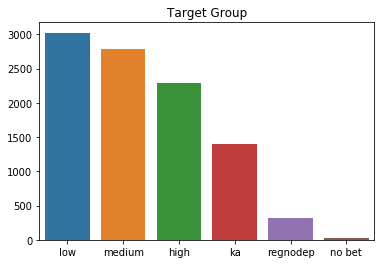

In [425]:
sns.barplot(x=target['last_12months_segment'].value_counts().index, y=target['last_12months_segment'].value_counts().values)
plt.title('Target Group')

Text(0.5, 1.0, 'Control Group')

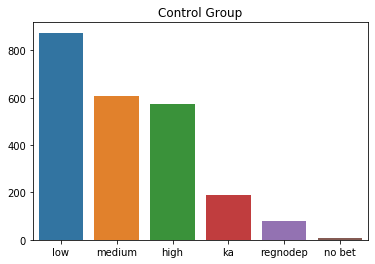

In [426]:
sns.barplot(x=control['last_12months_segment'].value_counts().index, y=control['last_12months_segment'].value_counts().values)
plt.title('Control Group')

distributions are pretty similar, except the target group has a higher proportion of medium tier customers. this might give insight to the targeted group of this promo 

which groups increased/decreased in proportions? 

In [427]:
# low
display(len(low_target) / len(target)) 
display(len(low_control) / len(control))

0.3071609954291519

0.3745719178082192

In [428]:
# medium
display(len(med_target) / len(target)) 
display(len(med_control) / len(control))

0.28369730827831385

0.2607020547945205

In [429]:
# high
display(len(high_target) / len(target)) 
display(len(high_control) / len(control))

0.23291010665312342

0.24529109589041095

In [430]:
# vip
display(len(vip_target) / len(target)) 
display(len(vip_control) / len(control))

0.14139156932453023

0.08176369863013698

In [431]:
# regnodep
display(len(regnodep_target) / len(target)) 
display(len(regnodep_control) / len(control))

0.03291010665312341

0.03424657534246575

In [432]:
# no bet
display(len(nobet_target) / len(target)) 
display(len(nobet_control) / len(control))

0.0019299136617572372

0.003424657534246575

the promo increased proportions for medium and vip tier accounts. this does not necessarily mean that these groups used the promos, the handle could still be 0. so we will dive deeper into these groups seeing which how many used the promo / put in money on a race. 

## New customers / How many took advantage of the promo? 

seeing how many accounts have a handle of 0 in both groups. a handle of 0 would indicate that they did not use promo given for this race 

In [433]:
display(len(target[target['handle']==0]) / len(target))
display(len(control[control['handle']==0]) / len(control))


0.12513966480446928

0.022688356164383562

In [434]:
target['bet'].value_counts().index

Int64Index([1, 0], dtype='int64')

Text(0.5, 1.0, 'Target Group Bets/No Bets')

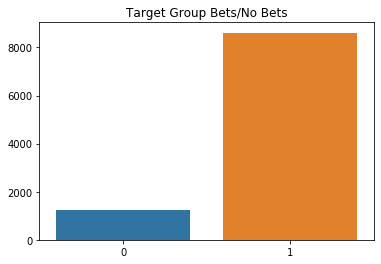

In [435]:
sns.barplot(x=target['bet'].value_counts().index, y=target['bet'].value_counts().values)
plt.title('Target Group Bets/No Bets')

Text(0.5, 1.0, 'Control Group Bets/No Bets')

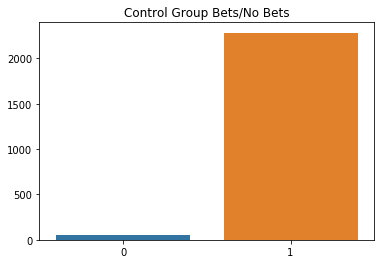

In [436]:
sns.barplot(x=control['bet'].value_counts().index, y=control['bet'].value_counts().values)
plt.title('Control Group Bets/No Bets')

It appears that more accounts in the target group did not bet, or put in no money. 

In [437]:
len(med_control[med_control['handle']==0]) / len(med_control)

0.019704433497536946

In [438]:
len(med_target[med_target['handle']==0]) / len(med_target)

0.09237379162191192

In [439]:
len(vip_control[vip_control['handle']==0]) / len(vip_control)

0.0

In [440]:
len(vip_target[vip_target['handle']==0]) / len(vip_target)

0.21551724137931033

Text(0.5, 1, 'Count of Customers Who Placed a Bet with/without Promo')

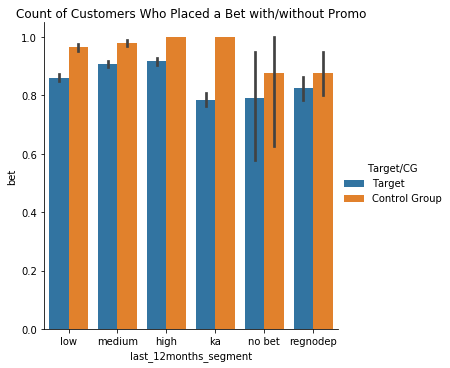

In [441]:
sns.factorplot(x='last_12months_segment', y='bet', kind='bar', hue='Target/CG', data=race)
plt.title('Count of Customers Who Placed a Bet with/without Promo')

## Regaining Interest in Existing Accounts 

look into regnodep and no bet accounts to see if promo was successful for these tiers

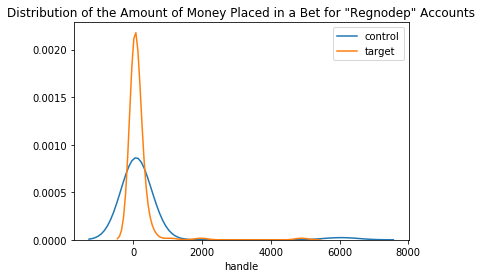

In [442]:
sns.distplot(regnodep_control[regnodep_control['bet']==1].handle, label='control', hist=False)
sns.distplot(regnodep_target[regnodep_target['bet']==1].handle, label='target', hist=False)
plt.title('Distribution of the Amount of Money Placed in a Bet for "Regnodep" Accounts')
plt.legend()

In [443]:
regnodep_target[regnodep_target['bet']==1].handle.mean()

152.14247191011233

In [444]:
regnodep_control[regnodep_control['bet']==1].handle.mean()

267.9242857142857

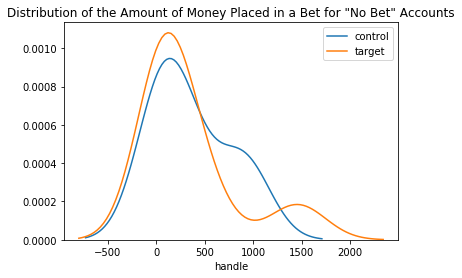

In [445]:
sns.distplot(nobet_control[nobet_control['bet']==1].handle, label='control', hist=False)
sns.distplot(nobet_target[nobet_target['bet']==1].handle, label='target', hist=False)
plt.title('Distribution of the Amount of Money Placed in a Bet for "No Bet" Accounts')
plt.legend()

In [446]:
nobet_target[nobet_target['bet']==1].handle.mean()

334.86333333333334

In [447]:
nobet_control[nobet_control['bet']==1].handle.mean()

364.7157142857142

## Analyzing Multiplicity of Accounts

we will now see if this promo encouraged users to place bets on more than one race. although the promo was only applied once, we can see if this promo gained interest/loyalty in users. 

In [448]:
race_mult = race.groupby(['accountid', 'last_12months_segment', 'Target/CG']).count().reset_index()
race_mult = race_mult.drop(columns=['handle', 'grossrevenue', 'bonus', 'date'], axis=0)

In [449]:
race_mult.head()

,accountid,last_12months_segment,Target/CG,bet
0,1128453,low,Target,17
1,1128604,medium,Target,221
2,1128675,low,Target,53
3,1129036,low,Control Group,1
4,1130293,low,Target,2


In [450]:
# checking that each record in the new df is a unique account 
display(race_mult.shape)
len(race_mult.accountid.unique())

(699, 4)

699

Text(0.5, 1, 'Frequency of Bets per Tier')

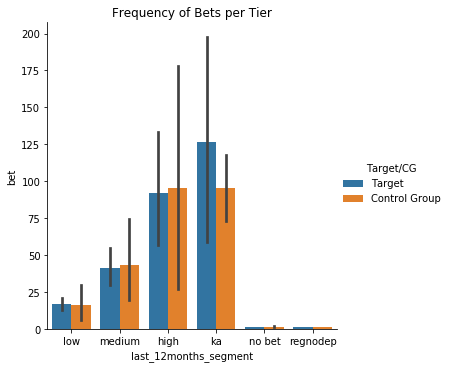

In [465]:
sns.catplot(x='last_12months_segment', y='bet', kind='bar', hue='Target/CG', data=race_mult)
plt.title('Frequency of Bets per Tier')

In [466]:
# grouping by account id so we get one row per user
target_mult = target.groupby(['accountid', 'last_12months_segment', 'Target/CG']).count().reset_index()
target_mult = target_mult.drop(columns=['handle', 'grossrevenue', 'bonus', 'date'], axis=0)

In [467]:
target_mult.head()

,accountid,last_12months_segment,Target/CG,bet
0,1128453,low,Target,17
1,1128604,medium,Target,221
2,1128675,low,Target,53
3,1130293,low,Target,2
4,1130358,low,Target,14


In [468]:
control_mult = control.groupby(['accountid', 'last_12months_segment', 'Target/CG']).count().reset_index()
control_mult = control_mult.drop(columns=['handle', 'grossrevenue', 'bonus', 'date'], axis=0)

In [469]:
control_mult.head()

,accountid,last_12months_segment,Target/CG,bet
0,1129036,low,Control Group,1
1,1136220,medium,Control Group,198
2,1148646,low,Control Group,40
3,1150380,low,Control Group,3
4,1155176,medium,Control Group,46


Text(0.5, 1.0, 'Distribution of Amount of Bets per Account')

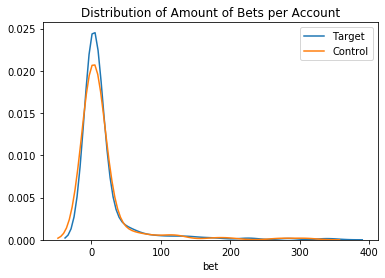

In [497]:
sns.distplot(target_mult.bet, hist=False, label='Target')
sns.distplot(control_mult.bet, hist=False, label='Control')
plt.title('Distribution of Amount of Bets per Account')

In [479]:
# low
low_target_mult = target_mult[target_mult['last_12months_segment']=='low']
low_control_mult = control_mult[control_mult['last_12months_segment']=='low']

Text(0.5, 1.0, 'Low Tier Distribution')

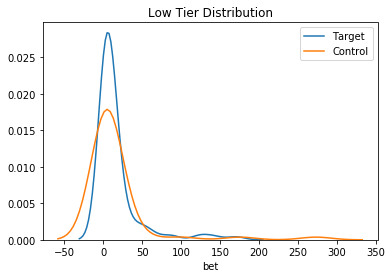

In [498]:
sns.distplot(low_target_mult.bet, hist=False, label='Target')
sns.distplot(low_control_mult.bet, hist=False, label='Control')
plt.title('Low Tier Distribution')

In [499]:
# vip
vip_target_mult = target_mult[target_mult['last_12months_segment']=='ka']
vip_control_mult = control_mult[control_mult['last_12months_segment']=='ka']

Text(0.5, 1.0, 'VIP Tier Distribution')

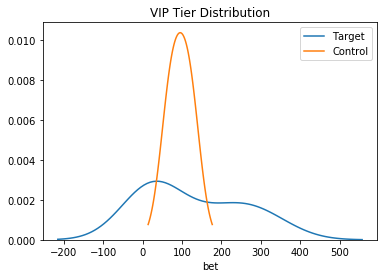

In [501]:
sns.distplot(vip_target_mult.bet, hist=False, label='Target')
sns.distplot(vip_control_mult.bet, hist=False, label='Control')
plt.title('VIP Tier Distribution')